No handles with labels found to put in legend.
/Users/Lallina/miniconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in true_divide


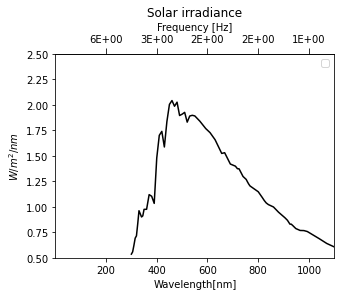

In [58]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
from sys import float_info
import scipy.constants as const
from matplotlib.ticker import FormatStrFormatter

#------------------------------------------------------------
MEDIUM_SIZE = 20
#------------------------------------------------------------

fig, ax1 = plt.subplots(figsize=(5, 3.75))
WL=[]
IRR=[]
WL= [  # nm
    300.0, 305.0, 310.0, 315.0, 320.0, 325.0, 330.0, 335.0, 340.0, 345.0,
    350.0, 360.0, 370.0, 380.0, 390.0, 400.0, 410.0, 420.0, 430.0, 440.0,
    450.0, 460.0, 470.0, 480.0, 490.0, 500.0, 510.0, 520.0, 530.0, 540.0,
    550.0, 570.0, 593.0, 610.0, 630.0, 656.0, 667.6, 690.0, 710.0, 718.0,
    724.4, 740.0, 752.5, 757.5, 762.5, 767.5, 780.0, 800.0, 816.0, 823.7,
    831.5, 840.0, 860.0, 880.0, 905.0, 915.0, 925.0, 930.0, 937.0, 948.0,
    965.0, 980.0, 993.5, 1040.0, 1070.0, 1100.0, 1120.0, 1130.0, 1145.0,
    1161.0, 1170.0, 1200.0, 1240.0, 1270.0, 1290.0, 1320.0, 1350.0, 1395.0,
    1442.5, 1462.5, 1477.0, 1497.0, 1520.0, 1539.0, 1558.0, 1578.0, 1592.0,
    1610.0, 1630.0, 1646.0, 1678.0, 1740.0, 1800.0, 1860.0, 1920.0, 1960.0,
    1985.0, 2005.0, 2035.0, 2065.0, 2100.0, 2148.0, 2198.0, 2270.0, 2360.0,
    2450.0, 2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.0, 3100.0, 3200.0,
    3300.0, 3400.0, 3500.0, 3600.0, 3700.0, 3800.0, 3900.0, 4000.0]
IRR= [  # W/m^2/nm
    0.5359, 0.5583, 0.622, 0.6927, 0.7151, 0.8329, 0.9619, 0.9319, 0.9006,
    0.9113, 0.9755, 0.9759, 1.1199, 1.1038, 1.0338, 1.4791, 1.7013, 1.7404,
    1.5872, 1.837, 2.005, 2.043, 1.987, 2.027, 1.896, 1.909, 1.927, 1.831,
    1.891, 1.898, 1.892, 1.84, 1.768, 1.728, 1.658, 1.524, 1.531, 1.42,
    1.399, 1.374, 1.373, 1.298, 1.269, 1.245, 1.223, 1.205, 1.183, 1.148,
    1.091, 1.062, 1.038, 1.022, 0.9987, 0.9472, 0.8932, 0.8682, 0.8297,
    0.8303, 0.814, 0.7869, 0.7683, 0.767, 0.7576, 0.6881, 0.6407, 0.6062,
    0.5859, 0.5702, 0.5641, 0.5442, 0.5334, 0.5016, 0.4775, 0.4427, 0.44,
    0.4168, 0.3914, 0.3589, 0.3275, 0.3175, 0.3073, 0.3004, 0.2928, 0.2755,
    0.2721, 0.2593, 0.2469, 0.244, 0.2435, 0.2348, 0.2205, 0.1908, 0.1711,
    0.1445, 0.1357, 0.123, 0.1238, 0.113, 0.1085, 0.0975, 0.0924, 0.0824,
    0.0746, 0.0683, 0.0638, 0.0495, 0.0485, 0.0386, 0.0366, 0.032, 0.0281,
    0.0248, 0.0221, 0.0196, 0.0175, 0.0157, 0.0141, 0.0127, 0.0115, 0.0104,
    0.0095, 0.0086]

plt.plot(WL, IRR, color='black', linestyle= 'solid')

plt.xlim(0.5, 1100)
plt.ylim(0.5, 2.5)

plt.xlabel('Wavelength[nm]')
plt.ylabel('$W/m^2/nm$')
plt.title('Solar irradiance')

def v2lambda(x):
    return const.c/(x)*1e9

def lambda2v(x):
    return const.c/(x*1e-9)

# Function to prevent zero values in an array
def preventDivisionByZero(some_array):
    corrected_array = some_array.copy()
    for i, entry in enumerate(some_array):
        # If element is zero, set to some small value
        if abs(entry) < float_info.epsilon:
            corrected_array[i] = float_info.epsilon
    
    return corrected_array
# Create the second x-axis on which the frequency will be displayed
ax2 = ax1.secondary_xaxis('top', functions=(lambda2E, E2lambda))
#ax2.set_xlabel('Wavelength (nm)', fontsize=20)
ax2.set_xlabel('Frequency [Hz]')
ax2.tick_params(axis='both', which='major',length=6)

# Invert the wavelength axis
ax2.invert_xaxis()

# Get ticks from ax1 (energy)
E_ticks = ax1.get_xticks()
E_ticks = preventDivisionByZero(E_ticks)

# Based on the ticks from ax1 (energy), calculate the corresponding wavelength in nm
wl_ticks = E2lambda(E_ticks)

# Make the values on ax2 (wavelength) integer values
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.0E' ))

# Make own array of wavelength ticks, so they are round numbers
# The values are not linearly spaced, but that is the idea.
#wl_ticks = np.asarray([100, 200, 500, 800, 1400])

# Set the ticks for ax2 (wl)
ax2.set_xticks(wl_ticks)

plt.legend();
#plt.show()



In [54]:
lambda2v(500)

599584915999999.9